In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('darkgrid')

# Merger and Acquisitions Dataset

In [2]:
df = pd.read_csv('acquisitions_update_2021.csv')
df

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,-,Citrix ITM


# Data Cleaning

We can see that there are empty values that are represented as '-'. This may show up in our visualizations so we will turn them into into empty values(NaN).

In [3]:
df = df.replace("-", np.nan)
df

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
2,3,Apple,1988,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
4,5,Apple,1989,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,NaN,NaN,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,NaN,NaN,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,NaN,United States,NaN,NaN,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,NaN,NaN,Citrix ITM


###### Let us now clean the numerical columns of the dataset we were given.

In [4]:
# Converting columns into numerical values
df['Acquisition Year'] = pd.to_numeric(df['Acquisition Year'], errors='coerce')
df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'], errors='coerce')

# Rename the column, per a billion
df = df.rename({'Acquisition Price': 'Acquisition Price(Billions)'}, axis=1)

# Exploratory Analysis:

# Have the number of acquisitions increased over the years?

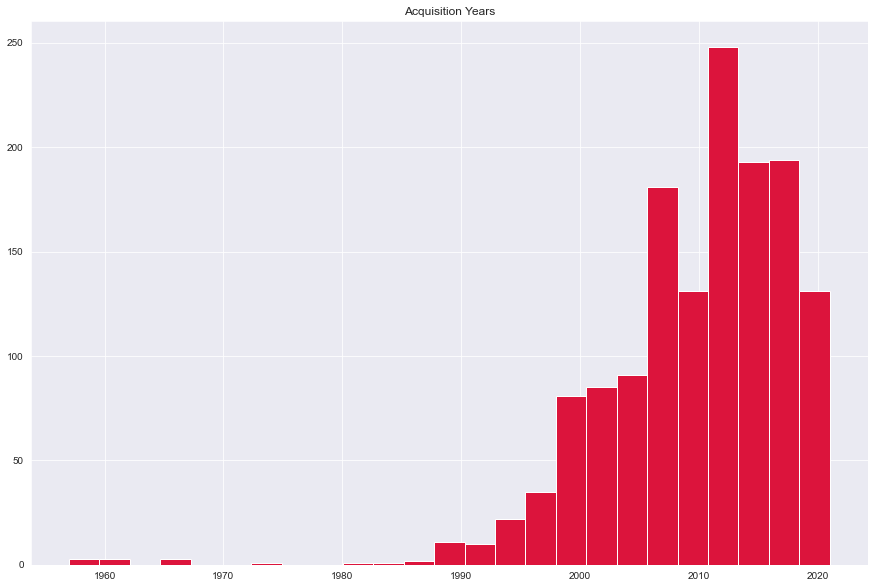

In [5]:
plt.figure(figsize=(15,10))
plt.title('Acquisition Years')
plt.hist(df['Acquisition Year'], bins=25, color='crimson');

##### Observation:
It appears that the number of acquisitions by tech companies have dramatically increased since the 1990s. This is somewhat representative of the Tech Industry which had a dramatic growth period in the 1990s.

## Which companies have the highest number of acquisitions?

In [6]:
companies = df['Parent Company'].value_counts()
companies_df = companies.to_frame().reset_index()
companies_df = companies_df.rename({'index': 'Parent Company', 'Parent Company': 'Acquisitions'}, axis=1)

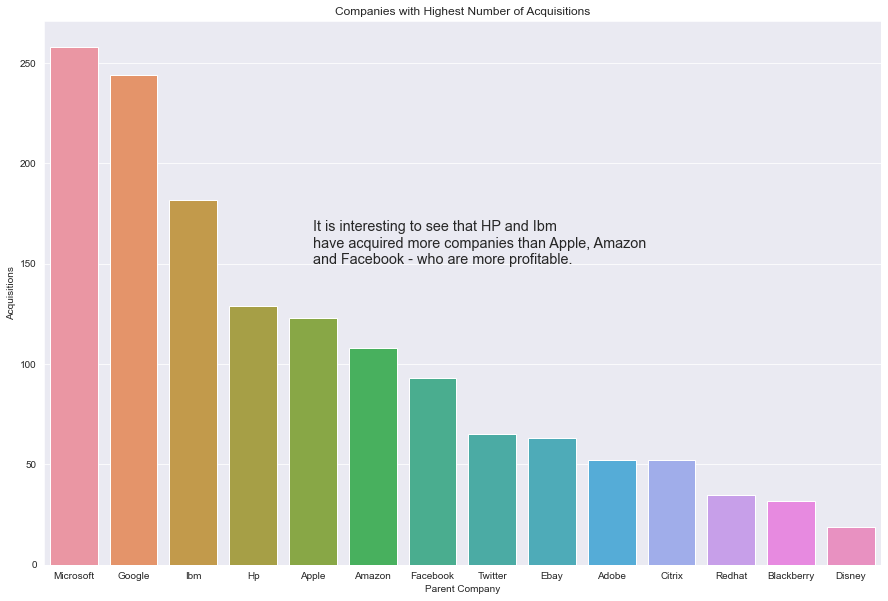

In [7]:
text = ('It is interesting to see that HP and Ibm' + '\n' + 'have acquired more companies than Apple, Amazon' + 
        '\n' + 'and Facebook - who are more profitable.')

plt.figure(figsize=(15,10))
plt.title('Companies with Highest Number of Acquisitions')
sns.barplot(x='Parent Company', y='Acquisitions', data=companies_df)
plt.text(x=4, y=150, s=text, size='x-large');

##### Observation:
It is seems that companies who have a stronger focus on computer software have a higher number of acquisitions. Perhaps this is because companies that specialize in computer software generate more revenue that supports these acquisitions.

# What are the most popular businesses to acquire?

In [8]:
business = df['Business'].value_counts()
business_df = business.to_frame().reset_index()
business_df = business_df.rename({'index': 'Business', 'Business': 'Total'}, axis=1)

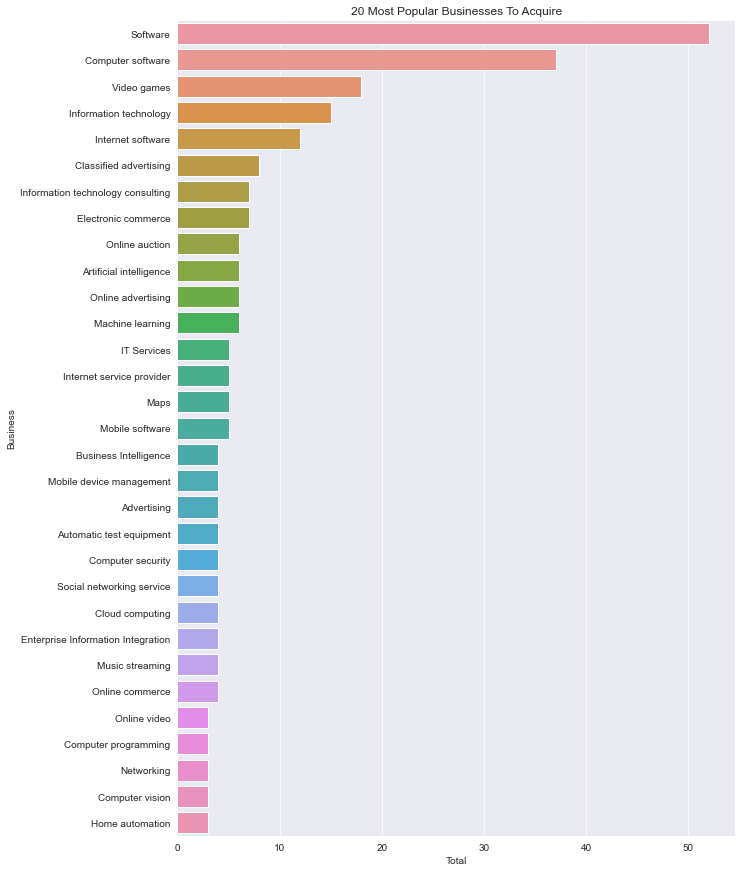

In [9]:
plt.figure(figsize=(10,15))
plt.title('20 Most Popular Businesses To Acquire')
sns.barplot(x='Total', y='Business', data=business_df[:31]);

##### Observation:
It appears that there is a disproportionately high number of software businesses that were acquired by tech companies. This supports our earlier observation that businesses that have a strong focus on Software may generate more revenue.

# What is the trend of the Acquisition Price

In [10]:
mask = df['Acquisition Year'].notnull() & df['Acquisition Price(Billions)'].notnull()
price_df = df[mask]

price_df = price_df[price_df['Acquisition Year'] > 1987]

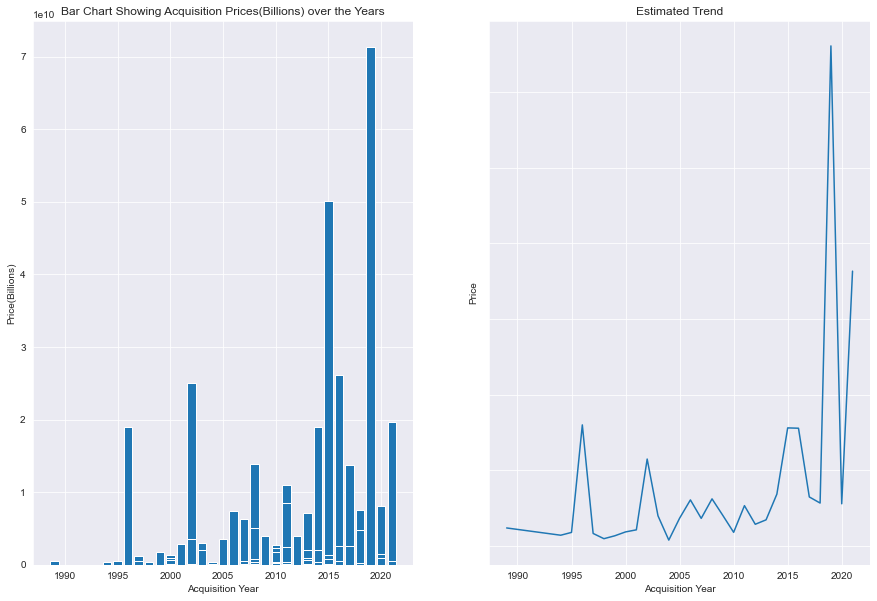

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Bar Chart
axes[0].set_title('Bar Chart Showing Acquisition Prices(Billions) over the Years')
axes[0].bar('Acquisition Year', 'Acquisition Price(Billions)', data=price_df)
axes[0].set_xlabel('Acquisition Year')
axes[0].set_ylabel('Price(Billions)')



# Trend
axes[1].set_title('Estimated Trend')
sns.lineplot(data=price_df, x='Acquisition Year', y='Acquisition Price(Billions)', ax=axes[1], ci=None)
axes[1].set_ylabel('Price')



axes[1].yaxis.set_ticklabels([]);


##### Observation:
If we observe the bar chart, we can tell that that the acquisition prices are very volatile. However, it seems that the prices have been increasing since 1990 despite the volatility. It is interesting to see that downturns in the trend matches periods of great economic decline.

# What were the most expensive companies to acquire?

In [12]:
expense_df = df.sort_values(by=['Acquisition Price(Billions)'], ascending=False)
num = expense_df.iloc[:20]['Acquisition Year'].astype(int)
exp = expense_df.iloc[:20]
exp = exp.reset_index(drop=True)
num = num.reset_index(drop=True)
exp.loc[:, 'Acquisition Year'] = num
exp[['Parent Company',  'Acquisition Price(Billions)', 'Acquired Company', 'Acquisition Year']]

,Parent Company,Acquisition Price(Billions),Acquired Company,Acquisition Year
0,Disney,7.130000e+10,21st Century Fox,2019
1,Twitter,5.010000e+10,Periscope,2015
2,Ibm,3.400000e+10,Red Hat,2019
3,Microsoft,2.620000e+10,LinkedIn,2016
4,Hp,2.500000e+10,Compaq,2002
5,Microsoft,1.970000e+10,Nuance Communications,2021
6,Facebook,1.900000e+10,WhatsApp,2014
7,Disney,1.900000e+10,Capital Cities/ABC Inc.,1996
8,Hp,1.390000e+10,Electronic Data Systems,2008
9,Amazon,1.370000e+10,Whole Foods Market,2017


##### Observation
The information on in the table above supports our earlier conclusion that acquisition prices were higher in the more recent years. The most expensive company to acquire was 21st Century Fox in the year 2019.

### Category

In [13]:
df['Category'].value_counts()

Twitter Cortex              2
Mobile Twitter app (iOS)    1
Analytics tools             1
Revenue team                1
Revenue engineering team    1
Design                      1
MoPub                       1
Commerce                    1
Twitter Spaces              1
Name: Category, dtype: int64

We can see that there is very little information we can get from the Category. However, it seems Twitter was more diligent in recording the categories.

# Where are the acquisitions of companies concentrated?

In [14]:
country = df['Country'].value_counts()
country_df = country.to_frame().reset_index()
country_df = country_df.rename({'index': 'Country', 'Country': 'Total'}, axis=1)

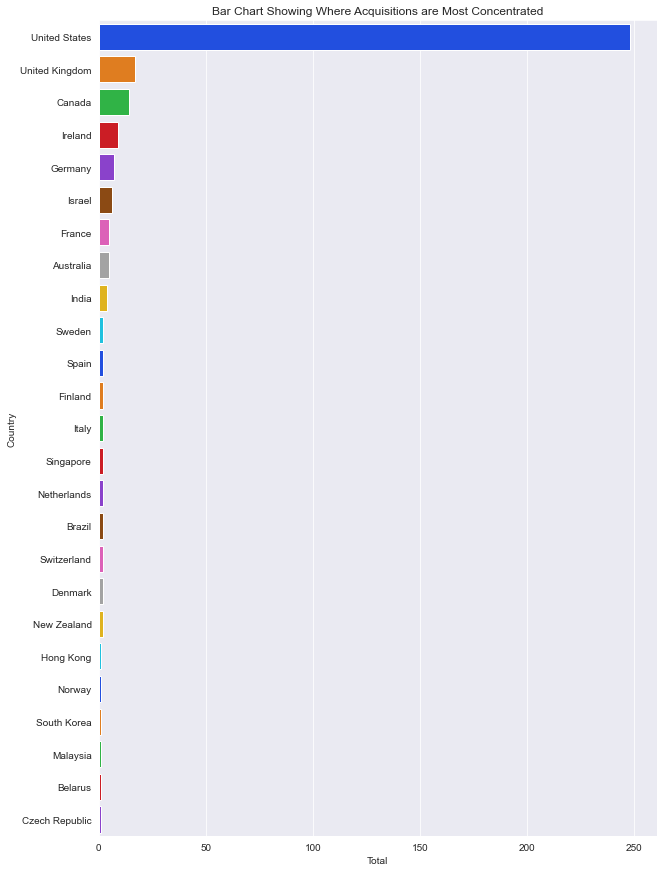

In [15]:
plt.figure(figsize=(10,15))
plt.title('Bar Chart Showing Where Acquisitions are Most Concentrated')
sns.barplot(x='Total', y='Country', data=country_df, palette='bright');

###### Observation
It appears that there is a disproportionately high number of companies that were acquired from the United States. This is matches what we know of the Tech Industry - that the United States is home to the largest tech companies. However, we can already see that the countries provided are not representative of the entire number of companies acquired. We only know 341 country location out of the 1455 companies acquired.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           1455 non-null   int64  
 1   Parent Company               1455 non-null   object 
 2   Acquisition Year             1427 non-null   float64
 3   Acquisition Month            1397 non-null   object 
 4   Acquired Company             1455 non-null   object 
 5   Business                     1181 non-null   object 
 6   Country                      341 non-null    object 
 7   Acquisition Price(Billions)  383 non-null    float64
 8   Category                     10 non-null     object 
 9   Derived Products             403 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 113.8+ KB
